<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-y/blob/main/4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

##Load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Use GPU to work with enhaced power in Colab

import tensorflow as tf

if tf.test.gpu_device_name():
  print(f'Default GPU Device: {tf.test.gpu_device_name()}')
else:
  print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
#Loading file
df_sent = pd.read_csv('/content/sample_data/df_sent.csv')

In [4]:
df_sent

,Unnamed: 0,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,time_signature_4,time_signature_5,negative,neutral,positive,compound,WordList,polarity_textblob,flair_score,flair_value
0,0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,...,1,0,0.081,0.722,0.197,0.9778,"['were', 'happens', 'will', 'never', 'this', '...",0.090476,0.999132,POSITIVE
1,1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,...,1,0,0.053,0.581,0.366,0.9968,"['my', 'must', 'oh', 'might', ""i'll"", 'tell', ...",0.366815,0.995719,POSITIVE
2,2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,...,1,0,0.046,0.920,0.034,-0.2732,"['a', 'begin', 'is', 'feel', 'will', 'might', ...",0.000000,0.975547,POSITIVE
3,3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,...,1,0,0.179,0.690,0.131,-0.9489,"['a', 'must', 'oh', 'might', ""i'll"", 'feeling'...",-0.179762,0.998968,NEGATIVE
4,4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,...,1,0,0.074,0.697,0.229,0.9766,"['my', 'castle', 'mountain', 'a', 'hall', 'giv...",0.300871,0.886031,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2484,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,...,1,0,0.330,0.564,0.106,-0.9979,"['laughs', 'will', 'turn', 'deceive', 'stone',...",-0.200000,0.732693,NEGATIVE
2485,2485,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,...,1,0,0.066,0.866,0.068,0.3818,"['fire', 'happy', 'meadow', 'a', 'is', 'might'...",0.278636,0.998828,POSITIVE
2486,2486,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,...,1,0,0.043,0.691,0.266,0.9986,"['crazy', 'change', 'for', 'night', 'miss', 'a...",0.180952,0.982428,POSITIVE
2487,2487,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,...,1,0,0.059,0.779,0.162,0.9983,"['happy', 'mention', 'agree', 'will', 'loving'...",0.143328,0.750563,POSITIVE


In [5]:
#remove added index column
df_sent = df_sent.drop('Unnamed: 0', axis = 1)

##Handling categorical data

Now we want to create dummies for our categorical Variables

In [6]:
#encode categorical variable
df_dummies_flair = pd.get_dummies(df_sent.flair_value)

In [7]:
df_dummies_flair

,NEGATIVE,POSITIVE
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
2484,1,0
2485,0,1
2486,0,1
2487,0,1


In [8]:
df_dummies_flair.isna().sum()

NEGATIVE    0
POSITIVE    0
dtype: int64

In [ ]:
#save dataset
df_dummies_flair.to_csv('/content/sample_data/df_dummies_flair.csv', index=False)

In [ ]:
#load data flair
df_dummies_flair = pd.read_csv('/content/sample_data/df_dummies_flair.csv')

In [ ]:
df_dummies_flair

,NEGATIVE,POSITIVE
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
2484,1,0
2485,0,1
2486,0,1
2487,0,1


In [9]:
#check if there are any missing values
#sometimes the saving and reuploading of the dataset led to missing values in the data. That's why we double check
df_dummies_flair.isna().sum()

NEGATIVE    0
POSITIVE    0
dtype: int64

Now we want to create dummies for every relevant word included in the lyrics.
We chose to not use word embedding or any other vectorization technique for our lyrics columns, since this would make it almost impossible to interpret the significance. We want to see whether a specific word in the lyrics may have an impact on the popularity or not.

In [10]:
#we want to remove stop words from the WordList. For this we modify the used function to create the WordList column

def get_unique_word_list(lyrics):
    word_list = lyrics.split()
    unique_word_list = str(set(word_list)) #when converting the list to a set, the duplicate words are removed. We convert it to a string rather than using a list
    return unique_word_list

In [11]:
#Append a new column "WordList1" which contains a list with all the used columns
df_sent['WordList1'] = df_sent['lyrics'].apply(get_unique_word_list)

We chose to remove the stop words because in the upcoming process we want to know whether any specific words influence the popularity of a song. If the stop words were included in the analysis and they turn out to have an influence on our dependent variable, we wouldn't be able to interprete the results.

In [12]:
#We now want to remove stop words
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to remove stopwords from a text string
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Apply the function to the 'text_column'
df_sent['WordList1'] = df_sent['WordList1'].apply(remove_stopwords)

In [13]:
df_sent.WordList1

0       { " " , ' man ' , ' ends ' , ' forever ' , ' p...
1       { ' wo ' , ' ' , ' ' , ' ' , ' ' , ' ' , ' ' ,...
2       { ' ' , ' weather ' , ' ' , ' bedroom ' , " ' ...
3       { ' ' , ' ' , ' ' , ' help ' , ' million ' , '...
4       { ' gambler ' , ' ' , ' mountain ' , ' things ...
                              ...                        
2484    { ' seize ' , ' ' , ' cave ' , ' cold ' , ' ' ...
2485    { " " , ' conspire ' , ' ' , " " , ' ' , ' par...
2486    { " " , ' ' , ' ' , ' ' , ' gon na ' , ' ' , "...
2487    { ' rapper ' , ' man ' , ' blind ' , ' oooh ' ...
2488    { ' ' , ' ' , " 'cause " , ' help ' , ' days '...
Name: WordList1, Length: 2489, dtype: object

In [14]:
import re
df_sent['WordList1'] = df_sent['WordList1'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', "", x))

In [15]:
df_sent.WordList1

0            man    ends    forever    promise        ...
1         wo                            guy    tomorro...
2            weather       bedroom     til    ya    fo...
3                  help    million       barrier      ...
4         gambler       mountain    things       sea  ...
                              ...                        
2484      seize       cave    cold                    ...
2485         conspire             parson    brown    m...
2486                  gon na             cherished    ...
2487      rapper    man    blind    oooh    bite    pr...
2488            cause    help    days    remember     ...
Name: WordList1, Length: 2489, dtype: object

In [16]:
df_sent['WordList2'] = df_sent['WordList1'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [17]:
df_sent.WordList2

0        man ends forever promise different girl lose ...
1        wo guy tomorrow life miss sayyou need sorrow ...
2        weather bedroom til ya found time tomorrow do...
3        help million barrier yeah wish rainbow barely...
4        gambler mountain things sea woman lowest cont...
                              ...                        
2484     seize cave cold sin near escape depths stares...
2485     conspire parson brown man job town listening ...
2486     gon na cherished hear got ta time needed craz...
2487     rapper man blind oooh bite precisely tax v on...
2488     cause help days remember fulfilled said head ...
Name: WordList2, Length: 2489, dtype: object

In [18]:
df_sent.WordList3 = df_sent.WordList2.str.split(' ')

<ipython-input-18-942a33587344>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_sent.WordList3 = df_sent.WordList2.str.split(' ')


In [19]:
df_sent['WordList4'] = list(df_sent.WordList3)

In [20]:
df_sent.WordList4

0       [, man, ends, forever, promise, different, gir...
1       [, wo, guy, tomorrow, life, miss, sayyou, need...
2       [, weather, bedroom, til, ya, found, time, tom...
3       [, help, million, barrier, yeah, wish, rainbow...
4       [, gambler, mountain, things, sea, woman, lowe...
                              ...                        
2484    [, seize, cave, cold, sin, near, escape, depth...
2485    [, conspire, parson, brown, man, job, town, li...
2486    [, gon, na, cherished, hear, got, ta, time, ne...
2487    [, rapper, man, blind, oooh, bite, precisely, ...
2488    [, cause, help, days, remember, fulfilled, sai...
Name: WordList4, Length: 2489, dtype: object

We now want to turn the individual entries into individual binary columns

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df_dummies_words = pd.DataFrame(mlb.fit_transform(df_sent['WordList4']), columns=mlb.classes_, index=df_sent.index)

In [22]:
df_dummies_words.columns

Index(['', '0', '00', '000', '01', '01000111', '013', '015', '018', '02',
       ...
       'zoom', 'zoop', 'zoovier', 'zoovile', 'zoy', 'zq', 'zu', 'zuccini',
       'zucker', 'zyou'],
      dtype='object', length=17215)

For some reason there's a lot of columns starting with numbers. We are guessing, that the index was also dummy encoded

In [23]:
#find all columns with a name that only includes numbers
numerical_columns = df_dummies_words.filter(regex='^\d+$')
print(numerical_columns)

      0  00  000  01  01000111  013  015  018  02  021  ...  965  973  978  \
0     0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
1     0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
2     0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
3     0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
4     0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
...  ..  ..  ...  ..       ...  ...  ...  ...  ..  ...  ...  ...  ...  ...   
2484  0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
2485  0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
2486  0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
2487  0   0    0   0         0    0    0    0   0    0  ...    0    0    0   
2488  0   0    0   0         0    0    0    0   0    0  ...    0    0    0   

      98  982  984  99  991  992  994  
0      0    0    0   0 

In [24]:
df_dummies_words = df_dummies_words.drop(columns=numerical_columns.columns)

In [25]:
df_dummies_words

,,12x,13th,14a,15th,1st,1x,2022spaceman,203x,20k,...,zoom,zoop,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2485,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#we need to remove the first columns, as it is not a word
column_to_drop = 0
df_dummies_words = df_dummies_words.drop(df_dummies_words.columns[column_to_drop], axis=1)

In [27]:
df_dummies_words

,12x,13th,14a,15th,1st,1x,2022spaceman,203x,20k,20th,...,zoom,zoop,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_dummies_words.isna().sum()

12x        0
13th       0
14a        0
15th       0
1st        0
          ..
zq         0
zu         0
zuccini    0
zucker     0
zyou       0
Length: 16758, dtype: int64

In [ ]:
#save dataframe with dummy words
df_dummies_words.to_csv('/content/sample_data/df_dummies_words.csv', index=False)


In [ ]:
#load word dummies and check whether the saving process was correct
df_dummies_words = pd.read_csv('/content/sample_data/df_dummies_words.csv')

In [ ]:
df_dummies_words

,12x,13th,14a,15th,1st,1x,2022spaceman,203x,20k,20th,...,zoom,zoop,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_dummies_words.isna().sum()

12x        0
13th       0
14a        0
15th       0
1st        0
          ..
zq         0
zu         0
zuccini    0
zucker     0
zyou       0
Length: 16758, dtype: int64

##KNN with chosen variables

###Data preparation

As we have a lot of variables, we figured that it might be better if we concentrate only on important ones for our model. This will also make the interpretation of the results easier. We now want to create a new DataFrame including only relevant variables for our model.

In [30]:
#check which variables are included in the data frame
list(df_sent.columns)

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'lyrics',
 'explicit_False',
 'explicit_True',
 'mode_0',
 'mode_1',
 'key_0',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'track_genre_acoustic',
 'track_genre_afrobeat',
 'track_genre_alt-rock',
 'track_genre_alternative',
 'track_genre_ambient',
 'track_genre_anime',
 'track_genre_black-metal',
 'track_genre_bluegrass',
 'track_genre_blues',
 'track_genre_brazil',
 'track_genre_breakbeat',
 'track_genre_british',
 'track_genre_cantopop',
 'track_genre_chicago-house',
 'track_genre_children',
 'track_genre_chill',
 'track_genre_classical',
 'track_genre_club',
 'track_genre_comedy',
 'track_genre_country',
 'track_genre_dance',
 'track_genre_dancehall',
 'track_genre_death-metal',
 'track_genre_deep-house',
 'track_genre_detroit-techno',
 'track_genre_disco

In [31]:
#find out what the indexes are of specific values in order to drop them using iloc in the upcoming step
print(df_sent.columns.get_loc('key_0'))
print(df_sent.columns.get_loc('positive'))

16
149


In [32]:
df_reg = df_sent.drop(df_sent.columns[16:150], axis=1)
df_reg = df_reg.drop(['lyrics', 'flair_score', 'flair_value', 'WordList', 'WordList1', 'WordList2', 'WordList4'], axis = 1)
#drop all string variablen - they were dummy encoded in the previous steps.
#Also remove flair score as this only indicates how high the confidence of the predicted value is.

In [33]:
df_reg.isna().sum()

popularity           0
duration_ms          0
danceability         0
energy               0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
explicit_False       0
explicit_True        0
mode_0               0
mode_1               0
compound             0
polarity_textblob    0
dtype: int64

In [34]:
df_reg

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_False,explicit_True,mode_0,mode_1,compound,polarity_textblob
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,176.025,1,0,0,1,0.9778,0.090476
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,101.171,1,0,0,1,0.9968,0.366815
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,144.553,1,0,1,0,-0.2732,0.000000
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,0.346,136.123,1,0,1,0,-0.9489,-0.179762
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,0.830,141.371,1,0,0,1,0.9766,0.300871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,0.676,150.813,1,0,1,0,-0.9979,-0.200000
2485,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.664,145.363,1,0,0,1,0.3818,0.278636
2486,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,0.733,123.997,1,0,1,0,0.9986,0.180952
2487,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,0.759,108.141,1,0,0,1,0.9983,0.143328


We now need to join the dummy datasets to the new regression dataset

In [35]:
#join the dummies to the dataset
df_reg_final = pd.concat([df_reg, df_dummies_words, df_dummies_flair], axis=1)

In [36]:
df_reg_final

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou,NEGATIVE,POSITIVE
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,...,0,0,0,0,0,0,0,0,0,1
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,...,0,0,0,0,0,0,0,0,0,1
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,...,0,0,0,0,0,0,0,0,0,1
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,0.830,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,0.676,...,0,0,0,0,0,0,0,0,1,0
2485,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.664,...,0,0,0,0,0,0,0,0,0,1
2486,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,0.733,...,0,0,0,0,0,0,0,0,0,1
2487,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,0.759,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_reg_final.isna().sum()

popularity      0
duration_ms     0
danceability    0
energy          0
loudness        0
               ..
zuccini         0
zucker          0
zyou            0
NEGATIVE        0
POSITIVE        0
Length: 16777, dtype: int64

In [38]:
df_reg_final.popularity

,popularity,popularity
0,36,0
1,49,0
2,66,0
3,57,0
4,13,0
...,...,...
2484,1,0
2485,0,0
2486,3,0
2487,29,0


In [39]:
#we realised that now there are two columns named popularity. One is our target column and the other one is the dummy variable for the word popularity.
#we thus need to rename our target column
df_reg_final.columns.values[0] = "target_popularity"

In [40]:
df_reg_final.target_popularity

0       36
1       49
2       66
3       57
4       13
        ..
2484     1
2485     0
2486     3
2487    29
2488    60
Name: target_popularity, Length: 2489, dtype: int64

In [41]:
df_reg_final.isna().sum()

target_popularity    0
duration_ms          0
danceability         0
energy               0
loudness             0
                    ..
zuccini              0
zucker               0
zyou                 0
NEGATIVE             0
POSITIVE             0
Length: 16777, dtype: int64

In [51]:
#Save final dataset before training
df_reg_final.to_csv('/content/sample_data/df_knn.csv', index = False)

In [45]:
#load data anc check whether the saving procedure worked
df_knn = pd.read_csv('/content/sample_data/df_knn.csv')

In [46]:
df_knn

,target_popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou,NEGATIVE,POSITIVE
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,...,0,0,0,0,0,0,0,0,0,1
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,...,0,0,0,0,0,0,0,0,0,1
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,...,0,0,0,0,0,0,0,0,0,1
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,0.830,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,0.676,...,0,0,0,0,0,0,0,0,1,0
2485,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.664,...,0,0,0,0,0,0,0,0,0,1
2486,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,0.733,...,0,0,0,0,0,0,0,0,0,1
2487,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,0.759,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df_knn.isna().sum()

target_popularity    0
duration_ms          0
danceability         0
energy               0
loudness             0
                    ..
zuccini              0
zucker               0
zyou                 0
NEGATIVE             0
POSITIVE             0
Length: 16777, dtype: int64

###Train model

In [48]:
#Loading file
df_knn = pd.read_csv('/content/sample_data/df_knn.csv')

In [ ]:
#Create a Train, Test split
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_knn, test_size = 0.4, random_state=42)

x_train = train.drop('target_popularity', axis=1)
y_train = train['target_popularity']

x_test = test.drop('target_popularity', axis = 1)
y_test = test['target_popularity']

In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train_sc = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test_sc = pd.DataFrame(x_test_scaled)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [ ]:
#we need to reset the index on the prediction data
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop = True)

In [ ]:
y_train

,target_popularity
0,0
1,35
2,26
3,0
4,0
...,...
1488,23
1489,0
1490,52
1491,33


In [ ]:
x_train_sc.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
16771    0
16772    0
16773    0
16774    0
16775    0
Length: 16776, dtype: int64

In [ ]:
x_test.isna().sum()

duration_ms     0
danceability    0
energy          0
loudness        0
speechiness     0
               ..
zuccini         0
zucker          0
zyou            0
NEGATIVE        0
POSITIVE        0
Length: 16776, dtype: int64

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()

#train model
knn.fit(x_train_sc, y_train)

KNeighborsRegressor()

In [ ]:
#create predictions
pred=knn.predict(x_test_sc)

Lets take a look at the error rates for the different amounts of k

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn1 = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn1.fit(x_train_sc, y_train)  #fit the model
    pred1=knn1.predict(x_test_sc) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred1)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 38.745267880510646
RMSE value for k=  2 is: 31.192581788536486
RMSE value for k=  3 is: 28.28991475965302
RMSE value for k=  4 is: 26.798724297921048
RMSE value for k=  5 is: 25.970252522150357
RMSE value for k=  6 is: 25.388467799155485
RMSE value for k=  7 is: 25.34429870334154
RMSE value for k=  8 is: 25.41926175111873
RMSE value for k=  9 is: 25.552181693360264
RMSE value for k=  10 is: 25.350089113695226
RMSE value for k=  11 is: 25.25215610658751
RMSE value for k=  12 is: 25.287962259781224
RMSE value for k=  13 is: 25.204072626578657
RMSE value for k=  14 is: 25.160537948603682
RMSE value for k=  15 is: 25.216434209000834
RMSE value for k=  16 is: 25.221041668294262
RMSE value for k=  17 is: 25.21912824588979
RMSE value for k=  18 is: 25.239242856890378
RMSE value for k=  19 is: 25.251053904360813
RMSE value for k=  20 is: 25.296156717547326


<Axes: >

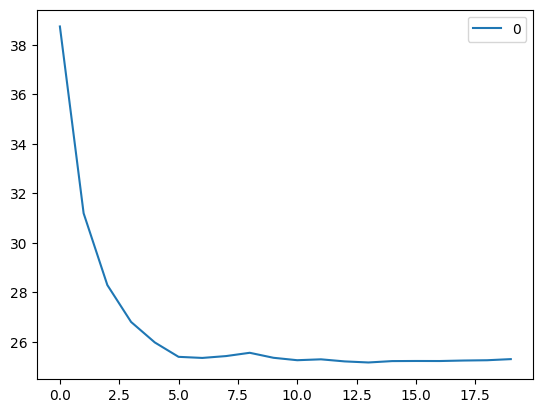

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

We see that the RMSE stops decreasing somewhere between k=5 to k=7

In [ ]:
#lets try finding the best k using Grid Search
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn2 = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn2, params, cv=5)
model.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
model.best_params_

{'n_neighbors': 8}

Grid Search indicates that k=8 is the best parameter for our data.

####Train on best number of k

In [ ]:
#lets train the model again with k=8

from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=8)

#train model
knn.fit(x_train_sc, y_train)

KNeighborsRegressor(n_neighbors=8)

In [ ]:
#create predictions
pred=knn.predict(x_test_sc)

In [ ]:
#check the r2 score
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.019998019677093692

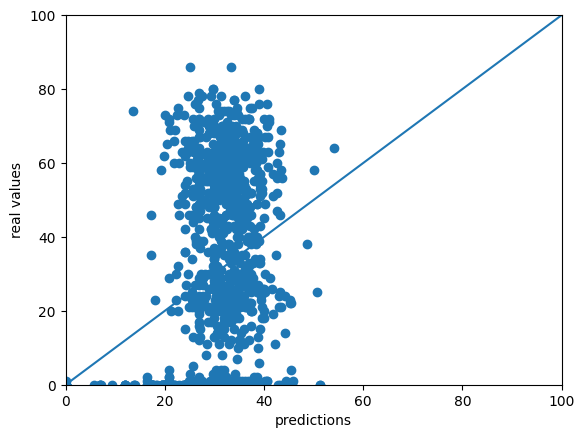

In [ ]:
#visualise results in scatter plot

import matplotlib.pyplot as plt

plt.scatter(pred, y_test)
plt.xlabel('predictions')
plt.ylabel('real values')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100],[0,100])

We see that the predictions don't match the real values and simultaneously the r2 is extremely low.

##KNN with all variables

As the model was not good with the chosen variables, we now want to try whether it will perform better with all the variables

###Data preparation

In [ ]:
df_sent.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,neutral,positive,compound,WordList,polarity_textblob,flair_score,flair_value,WordList1,WordList2,WordList4
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000,0.1420,0.275,...,0.722,0.197,0.9778,"['were', 'happens', 'will', 'never', 'this', '...",0.090476,0.999132,POSITIVE,hearts greatest happ...,hearts greatest happens lost given confess op...,"[, hearts, greatest, happens, lost, given, con..."
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000,0.1090,0.603,...,0.581,0.366,0.9968,"['my', 'must', 'oh', 'might', ""i'll"", 'tell', ...",0.366815,0.995719,POSITIVE,yay wo filled oh ...,yay wo filled oh like tell cry got ta love li...,"[, yay, wo, filled, oh, like, tell, cry, got, ..."
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000,0.1770,0.500,...,0.920,0.034,-0.2732,"['a', 'begin', 'is', 'feel', 'will', 'might', ...",0.000000,0.975547,POSITIVE,begin disarray mask eyes got ...,begin disarray mask eyes got come wait like f...,"[, begin, disarray, mask, eyes, got, come, wai..."
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309,0.2900,0.346,...,0.690,0.131,-0.9489,"['a', 'must', 'oh', 'might', ""i'll"", 'feeling'...",-0.179762,0.998968,NEGATIVE,barrier eyes help yeah got ...,barrier eyes help yeah got let feeling lonely...,"[, barrier, eyes, help, yeah, got, let, feelin..."
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000,0.0855,0.830,...,0.697,0.229,0.9766,"['my', 'castle', 'mountain', 'a', 'hall', 'giv...",0.300871,0.886031,POSITIVE,meet woman mansion dance k...,meet woman mansion dance kingdom hall wait he...,"[, meet, woman, mansion, dance, kingdom, hall,..."


In [ ]:
#drop all categorical data
df_knn2 = df_sent.drop(['lyrics', 'flair_value', 'WordList', 'WordList1',	'WordList2',	'WordList4'], axis = 1)

In [ ]:
#append dummy variables
df_knn2 = pd.concat([df_knn2, df_dummies_words, df_dummies_flair], axis=1)

In [ ]:
df_knn2

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou,NEGATIVE,POSITIVE
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,...,0,0,0,0,0,0,0,0,0,1
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,...,0,0,0,0,0,0,0,0,0,1
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,...,0,0,0,0,0,0,0,0,0,1
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,0.830,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,0.676,...,0,0,0,0,0,0,0,0,1,0
2485,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.664,...,0,0,0,0,0,0,0,0,0,1
2486,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,0.733,...,0,0,0,0,0,0,0,0,0,1
2487,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,0.759,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_knn2.columns.values[0] = "target_popularity"

In [ ]:
df_knn2.target_popularity

0       36
1       49
2       66
3       57
4       13
        ..
2484     1
2485     0
2486     3
2487    29
2488    60
Name: target_popularity, Length: 2489, dtype: int64

In [ ]:
#Save final dataset before training
df_knn2.to_csv('/content/sample_data/df_knn2.csv', index = False)

In [ ]:
#load data anc check whether the saving procedure worked
df_knn2 = pd.read_csv('/content/sample_data/df_knn2.csv')

In [ ]:
df_knn2

,target_popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou,NEGATIVE,POSITIVE
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,...,0,0,0,0,0,0,0,0,0,1
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,...,0,0,0,0,0,0,0,0,0,1
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,...,0,0,0,0,0,0,0,0,0,1
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,0.830,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,0.676,...,0,0,0,0,0,0,0,0,1,0
2485,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.664,...,0,0,0,0,0,0,0,0,0,1
2486,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,0.733,...,0,0,0,0,0,0,0,0,0,1
2487,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,0.759,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_knn2.isna().sum()

target_popularity    0
duration_ms          0
danceability         0
energy               0
loudness             0
                    ..
zuccini              0
zucker               0
zyou                 0
NEGATIVE             0
POSITIVE             0
Length: 16912, dtype: int64

###Train model

In [ ]:
#load data
df_knn2 = pd.read_csv('/content/sample_data/df_knn2.csv')

In [ ]:
#Create a Train, Test split
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_knn2, test_size = 0.4, random_state=42)

x_train = train.drop('target_popularity', axis=1)
y_train = train['target_popularity']

x_test = test.drop('target_popularity', axis = 1)
y_test = test['target_popularity']

In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train_sc = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test_sc = pd.DataFrame(x_test_scaled)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()

#train model
knn.fit(x_train_sc, y_train)

KNeighborsRegressor()

In [ ]:
#we need to reset the index on the prediction data
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop = True)

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()

#train model
knn.fit(x_train_sc, y_train)

KNeighborsRegressor()

In [ ]:
#create predictions
pred=knn.predict(x_test_sc)

In [ ]:
#calculate rmse for all possible k ranging from 1 to 20

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn1 = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn1.fit(x_train_sc, y_train)  #fit the model
    pred1=knn1.predict(x_test_sc) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred1)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 38.21164113293604
RMSE value for k=  2 is: 31.168363246565892
RMSE value for k=  3 is: 28.102812533430825
RMSE value for k=  4 is: 26.455017896186543
RMSE value for k=  5 is: 25.856391316027654
RMSE value for k=  6 is: 25.485960143489198
RMSE value for k=  7 is: 25.151735249940668
RMSE value for k=  8 is: 25.287411956124632
RMSE value for k=  9 is: 25.36418339501489
RMSE value for k=  10 is: 25.300701015733736
RMSE value for k=  11 is: 25.243019928218153
RMSE value for k=  12 is: 25.204495238146066
RMSE value for k=  13 is: 25.140868655950257
RMSE value for k=  14 is: 25.172823874134846
RMSE value for k=  15 is: 25.167910020085426
RMSE value for k=  16 is: 25.168814524217623
RMSE value for k=  17 is: 25.16826159799357
RMSE value for k=  18 is: 25.180118782935732
RMSE value for k=  19 is: 25.246752042423367
RMSE value for k=  20 is: 25.24699955332877


<Axes: >

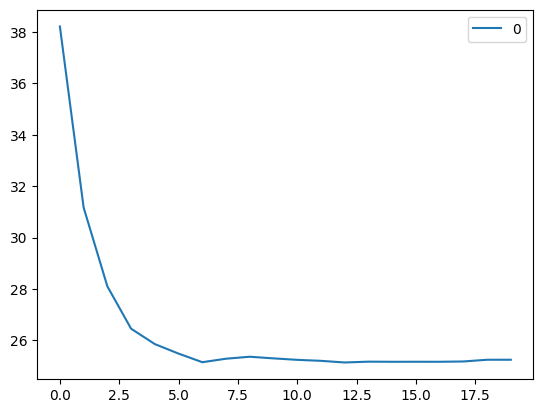

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [ ]:
#lets try finding the best k using Grid Search
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn2 = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn2, params, cv=5)
model.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
model.best_params_

{'n_neighbors': 8}

For this data 8 seems to be the best amount of k

####Train model on best number of k

In [ ]:
#lets train the model again with k=8

from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=8)

#train model
knn.fit(x_train_sc, y_train)

KNeighborsRegressor(n_neighbors=8)

In [ ]:
#create predictions
pred=knn.predict(x_test_sc)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.030138199763782958

the r2 score is 0.03, which is better than the last model but still very low

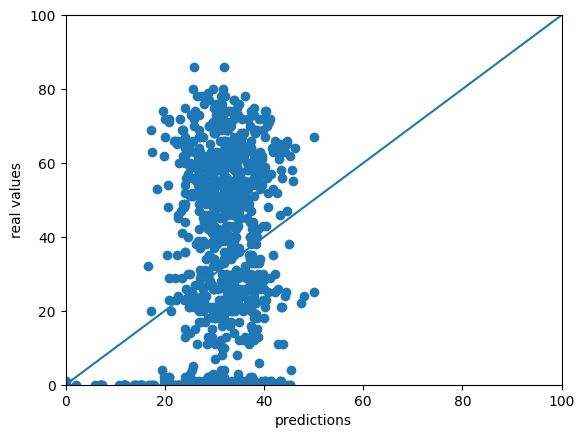

In [ ]:
#visualise results in scatter plot

import matplotlib.pyplot as plt

plt.scatter(pred, y_test)
plt.xlabel('predictions')
plt.ylabel('real values')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100],[0,100])

This model seems to have overfitted as a lot of the predictions are zero

###Fit on train data

As our results have not been very promising, we would like to see how the model performs on the train data. The performance should be way better, than when using test data

In [ ]:
#create predictions
pred_train=knn.predict(x_train_sc)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_train, pred_train)

0.28131036381691543

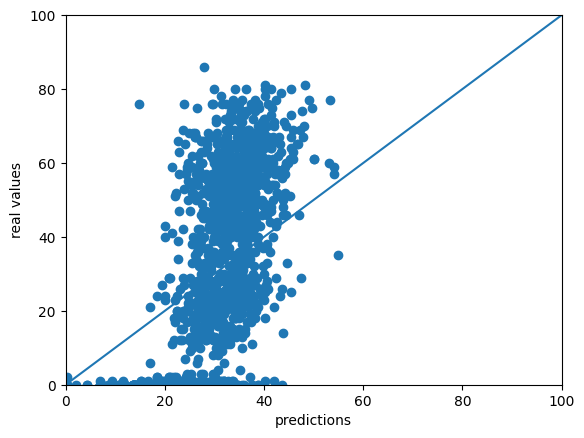

In [ ]:
#visualise results in scatter plot

import matplotlib.pyplot as plt

plt.scatter(pred_train, y_train)
plt.xlabel('predictions')
plt.ylabel('real values')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100],[0,100])

We can rule out overfitting. The model doesn't perform well on the training data either.

##Linear Regression

In [49]:
import pandas as pd
import numpy as np


###Data preperation

We load the data from above:

In [52]:
df_lin = pd.read_csv('/content/sample_data/df_knn.csv')

In [54]:
df_lin.head()

,target_popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,zoovier,zoovile,zoy,zq,zu,zuccini,zucker,zyou,NEGATIVE,POSITIVE
0,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000,0.1420,0.275,...,0,0,0,0,0,0,0,0,0,1
1,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000,0.1090,0.603,...,0,0,0,0,0,0,0,0,0,1
2,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000,0.1770,0.500,...,0,0,0,0,0,0,0,0,0,1
3,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
4,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000,0.0855,0.830,...,0,0,0,0,0,0,0,0,0,1


We do the Train-Test-Split on the data.

In [55]:
#Create a Train, Test split
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_lin, test_size = 0.3, random_state=42)

x_train = train.drop('target_popularity', axis=1)
y_train = train['target_popularity']

x_test = test.drop('target_popularity', axis = 1)
y_test = test['target_popularity']

We scale the data:

In [56]:
#scale data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_train_sc = pd.DataFrame(x_train_scaled)

x_test_scaled = std_scaler.fit_transform(x_test)
x_test_sc = pd.DataFrame(x_test_scaled)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

###Train Model

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
regr = LinearRegression()

In [59]:
regr.fit(x_train_scaled, y_train)

LinearRegression()

In [67]:
pred_lin = regr.predict(x_test_scaled)

In [60]:
print(regr.score(x_train_scaled, y_train))
print(regr.score(x_test_scaled, y_test))

0.9215249589587353
-1.839327984949311e+26


We can see that the model performs pretty well on our training data but not on our test data. This is an indicator of overfitting.

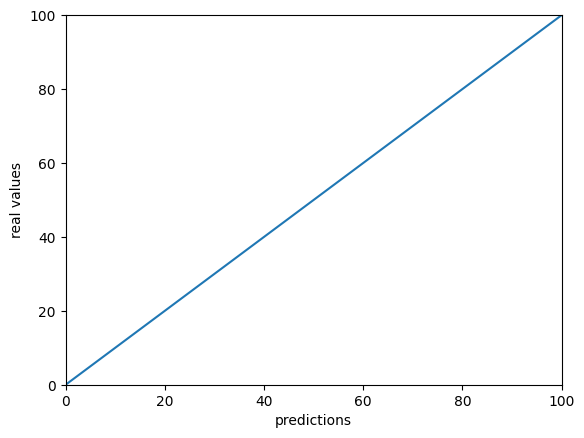

In [68]:
#visualise results in scatter plot

import matplotlib.pyplot as plt

plt.scatter(pred_lin, y_test)
plt.xlabel('predictions')
plt.ylabel('real values')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100],[0,100])

##Gaussian Process Regression

In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [62]:
regr_gp = GaussianProcessRegressor(alpha=1e-10).fit(x_train_scaled, y_train)

In [64]:
pred_gp = regr_gp.predict(x_test_scaled)

In [66]:
print(regr_gp.score(x_train_scaled, y_train))
print(regr_gp.score(x_test_scaled, y_test))

0.9938593311464906
-1.7719120463669311


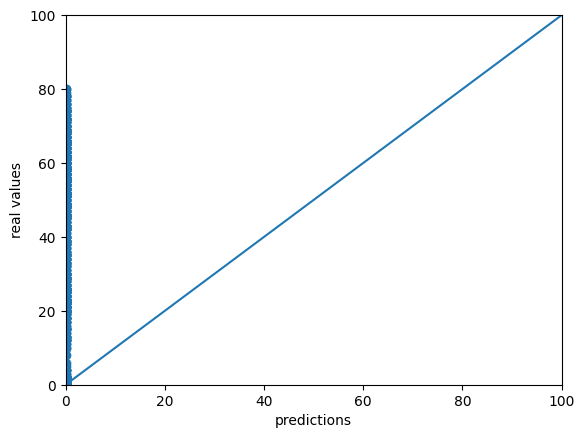

In [65]:
#visualise results in scatter plot

import matplotlib.pyplot as plt

plt.scatter(pred_gp, y_test)
plt.xlabel('predictions')
plt.ylabel('real values')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100],[0,100])